In [2]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [59]:
# Define the path to the .dat file
#record_path = 'mitdb/100'
record_path = '100'

# Read the .dat file using the wfdb.rdrecord() function

record = wfdb.rdrecord(record_path)

# Access the ECG signal and other metadata from the record object

n_samples=900
ecg_signal = record.p_signal
ecg_signal=ecg_signal[0:n_samples,1]
fs = record.fs
t = np.arange(0, ecg_signal.shape[0]/fs, 1/fs)




Text(0, 0.5, 'Frequency (Hz)')

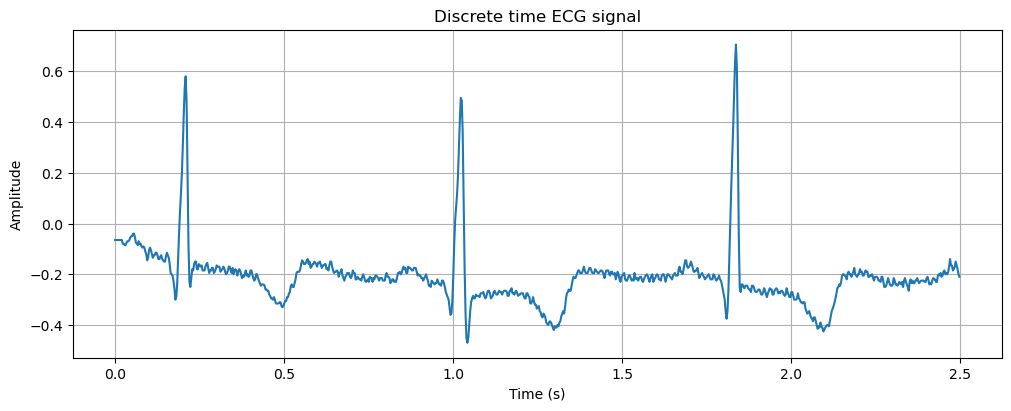

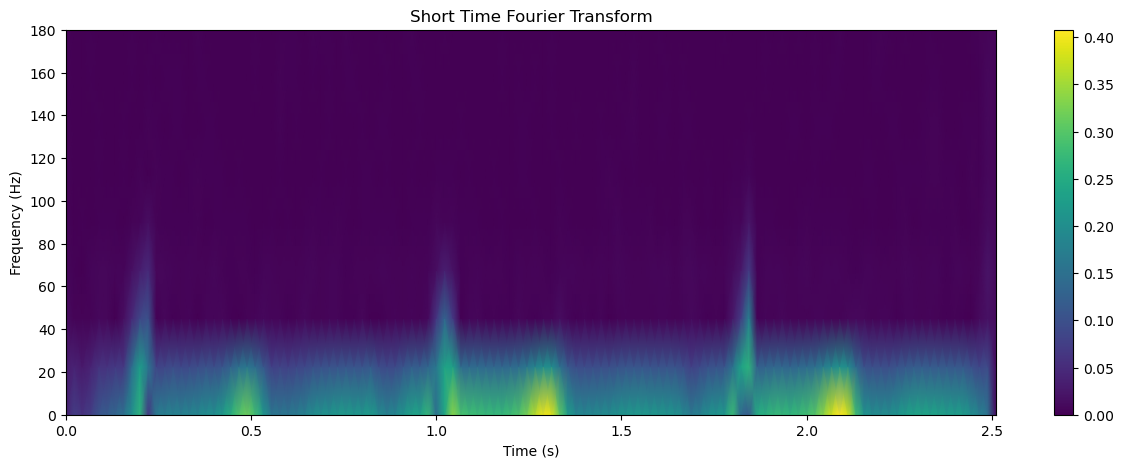

In [60]:
fig, ax = plt.subplots(constrained_layout = True, figsize = (10,4))
ax.plot(t,ecg_signal)
ax.set_title('Discrete time ECG signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()


f, tp, Zxx = signal.stft(ecg_signal, fs, nperseg = 16, noverlap = 8)
fig, ax = plt.subplots(figsize = (15,5))
S = 20*np.log10(np.abs(Zxx))
im = ax.pcolormesh(tp, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)), shading='gouraud')
fig.colorbar(im, ax=ax)
ax.set_title('Short Time Fourier Transform')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')


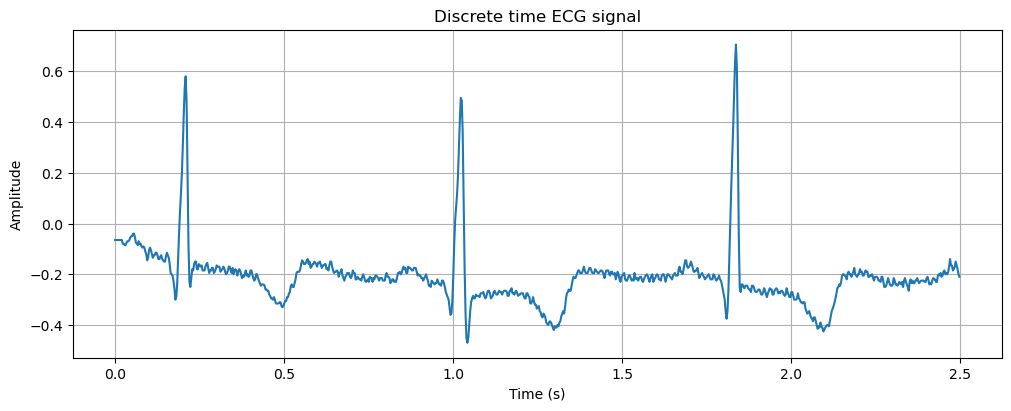

In [9]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Define the path to the .dat file
#record_path = 'mitdb/100'
record_path = '100'

# Read the .dat file using the wfdb.rdrecord() function

record = wfdb.rdrecord(record_path)

# Access the ECG signal and other metadata from the record object

n_samples=900
ecg_signal = record.p_signal
ecg_signal=ecg_signal[0:n_samples,1]
fs = record.fs
t = np.arange(0, ecg_signal.shape[0]/fs, 1/fs)

fig, ax = plt.subplots(constrained_layout = True, figsize = (10,4))
ax.plot(t,ecg_signal)
ax.set_title('Discrete time ECG signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()



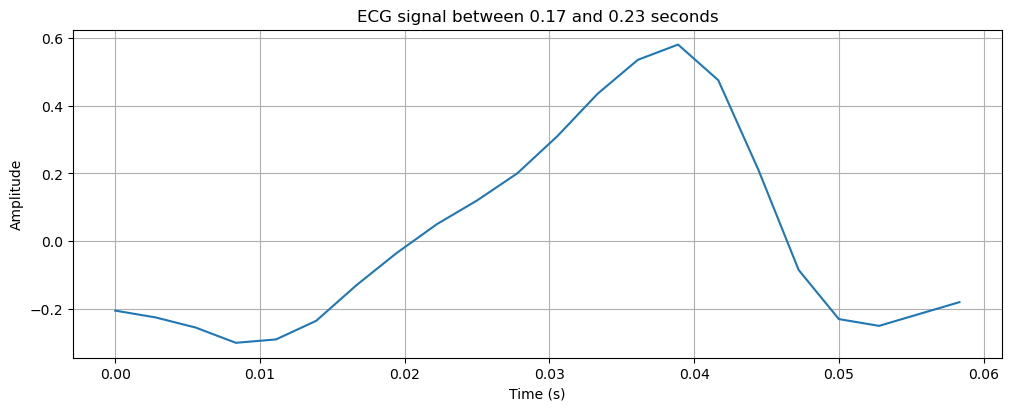

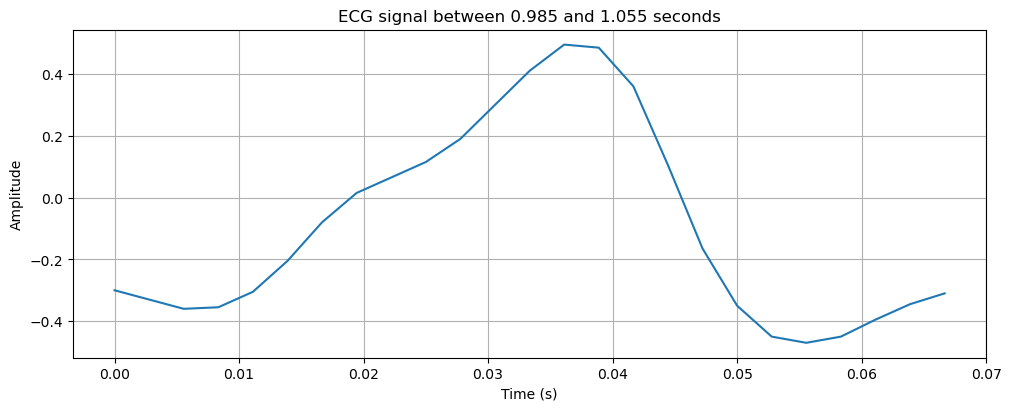

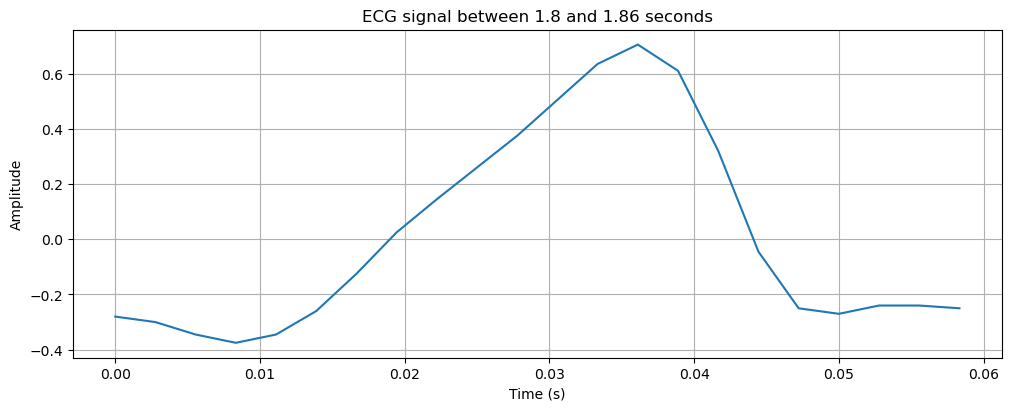

In [12]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the .dat file
#record_path = 'mitdb/100'
record_path = '100'

# Read the .dat file using the wfdb.rdrecord() function
record = wfdb.rdrecord(record_path)

# Access the ECG signal and other metadata from the record object
ecg_signal = record.p_signal[:, 1]
fs = record.fs
t = np.arange(0, ecg_signal.shape[0]/fs, 1/fs)

# Extract segment between 0.17 and 0.23 seconds
index_start = np.argmin(np.abs(t - 0.17))
index_end = np.argmin(np.abs(t - 0.23))
segment = ecg_signal[index_start:index_end]

# Create figure and plot segment of ECG signal
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 4))
ax.plot(np.arange(len(segment))/fs, segment)
ax.set_title('ECG signal between 0.17 and 0.23 seconds')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()

# Extract segment between 0.985 and 1.055 seconds
index_start = np.argmin(np.abs(t - 0.985))
index_end = np.argmin(np.abs(t - 1.055))
segment = ecg_signal[index_start:index_end]

# Create figure and plot segment of ECG signal
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 4))
ax.plot(np.arange(len(segment))/fs, segment)
ax.set_title('ECG signal between 0.985 and 1.055 seconds')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()

# Extract segment between 1.8 and 1.86 seconds
index_start = np.argmin(np.abs(t - 1.8))
index_end = np.argmin(np.abs(t - 1.86))
segment = ecg_signal[index_start:index_end]

# Create figure and plot segment of ECG signal
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 4))
ax.plot(np.arange(len(segment))/fs, segment)
ax.set_title('ECG signal between 1.8 and 1.86 seconds')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()



plt.show()


Maximum correlation at lag 0.986 seconds.


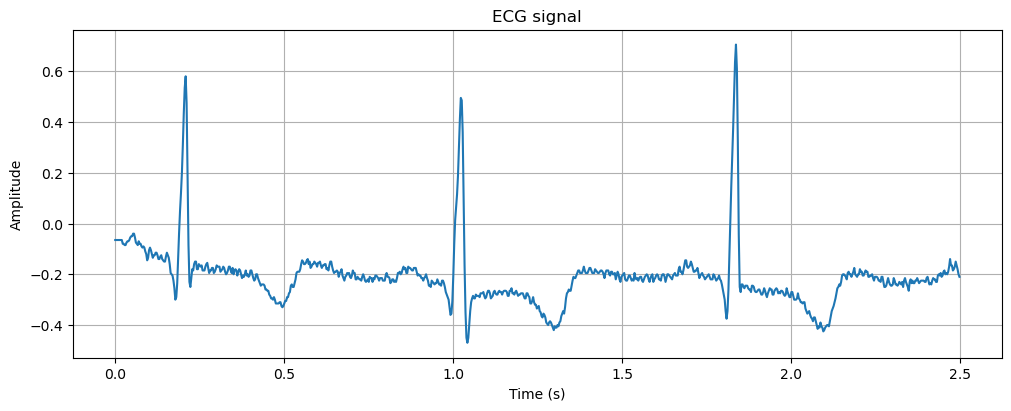

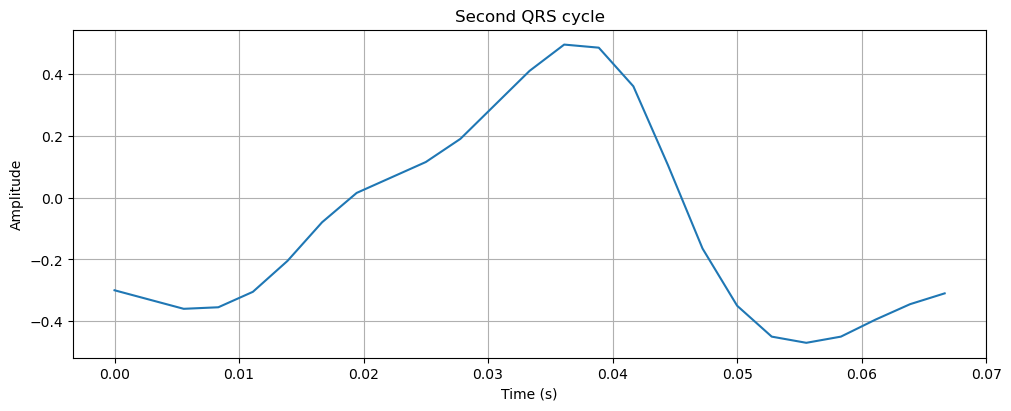

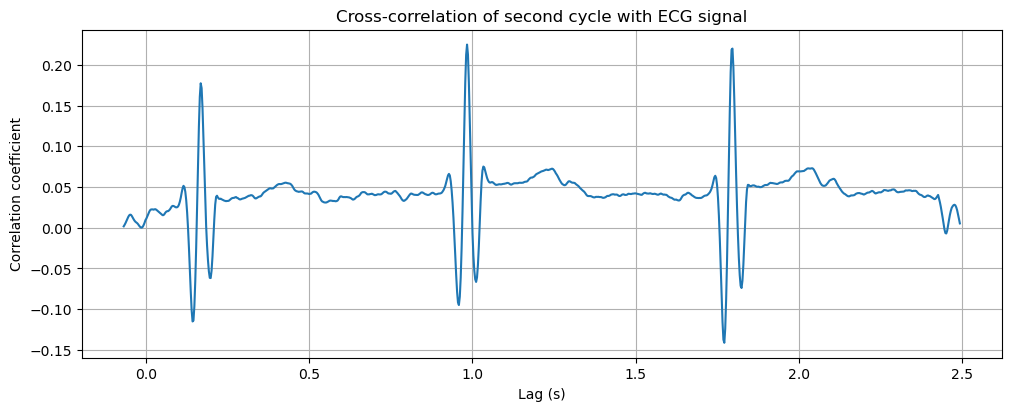

In [80]:

# Cargar señal ECG completa
record_path = '100'
n_samples=900
record = wfdb.rdrecord(record_path)
ecg_signal = record.p_signal[0:n_samples, 1]
fs = record.fs
t = np.arange(0, ecg_signal.shape[0]/fs, 1/fs)

# Extraer segmento con segundo ciclo QRS
index_start = np.argmin(np.abs(t - 0.985))
index_end = np.argmin(np.abs(t - 1.055))
qrs_cycle = ecg_signal[index_start:index_end]

# Calcular correlación cruzada manualmente
corr = np.convolve(ecg_signal, qrs_cycle[::-1], mode='full')
corr = corr / (np.linalg.norm(ecg_signal) * np.linalg.norm(qrs_cycle))

# Encontrar desplazamiento con máximo valor de correlación
lag = np.argmax(corr) - len(qrs_cycle) + 1

# Graficar resultados
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 4))
ax.plot(np.arange(len(ecg_signal))/fs, ecg_signal)
ax.set_title('ECG signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()

fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 4))
ax.plot(np.arange(len(qrs_cycle))/fs, qrs_cycle)
ax.set_title('Second QRS cycle')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()

fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 4))
ax.plot(np.arange(len(corr))/fs - len(qrs_cycle)/fs, corr)
ax.set_title('Cross-correlation of second cycle with ECG signal')
ax.set_xlabel('Lag (s)')
ax.set_ylabel('Correlation coefficient')
ax.grid()

print(f'Maximum correlation at lag {lag/fs:.3f} seconds.')


Maximum correlation at lag 1.800 seconds.


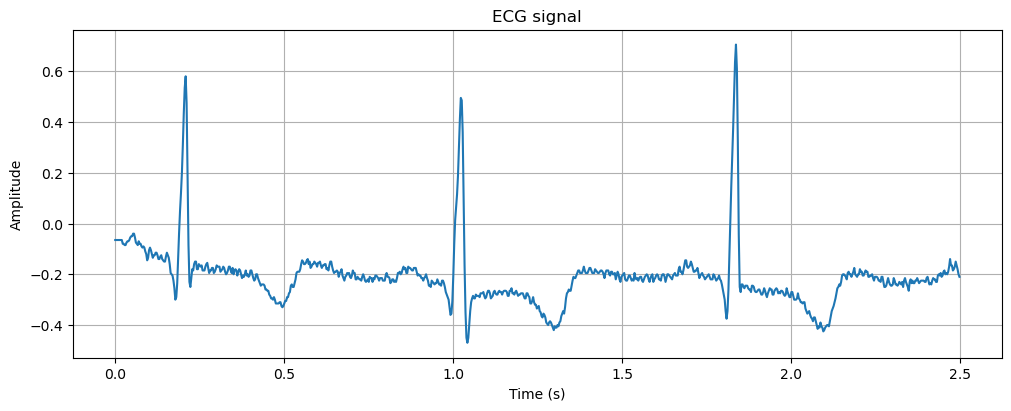

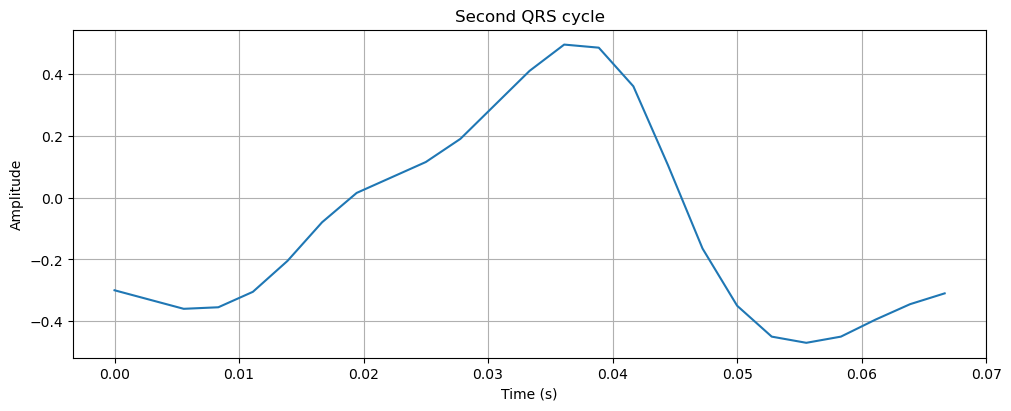

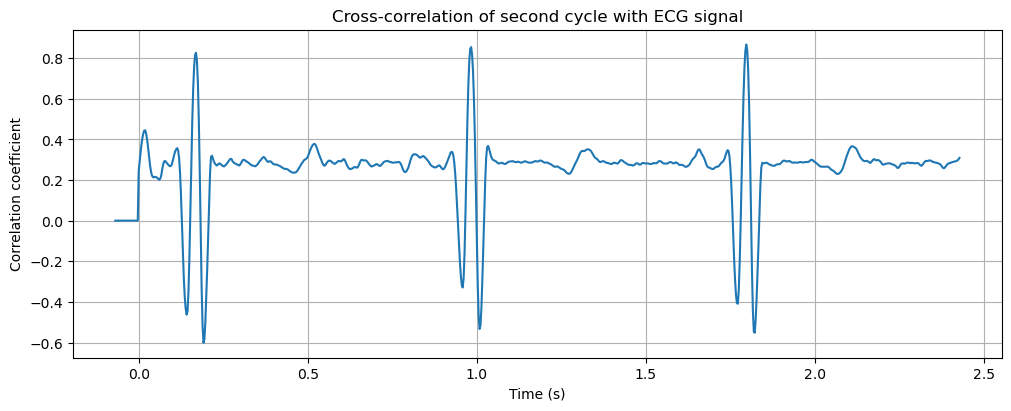

In [2]:
# Definir función para calcular la norma de un vector
def norm(vector):
    return np.sqrt(np.sum(vector**2))

# Cargar señal ECG completa
record_path = '100'
n_samples = 900
record = wfdb.rdrecord(record_path)
ecg_signal = record.p_signal[0:n_samples, 1]
fs = record.fs
t = np.arange(0, ecg_signal.shape[0]/fs, 1/fs)

# Extraer segmento con segundo ciclo QRS
index_start = np.argmin(np.abs(t - 0.985))
index_end = np.argmin(np.abs(t - 1.055))
qrs_cycle = ecg_signal[index_start:index_end]

# Calcular correlación cruzada manualmente
corr = np.zeros(len(ecg_signal))
for i in range(len(qrs_cycle), len(ecg_signal)):
    for j in range(len(qrs_cycle)):
        corr[i] += ecg_signal[i-j] * qrs_cycle[j]
    corr[i] = corr[i] / (norm(ecg_signal[i-len(qrs_cycle)+1:i+1]) * norm(qrs_cycle))

# Encontrar desplazamiento con máximo valor de correlación
lag = np.argmax(corr) - len(qrs_cycle) + 1

# Graficar resultados
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 4))
ax.plot(np.arange(len(ecg_signal))/fs, ecg_signal)
ax.set_title('ECG signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()

fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 4))
ax.plot(np.arange(len(qrs_cycle))/fs, qrs_cycle)
ax.set_title('Second QRS cycle')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()

fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 4))
ax.plot(np.arange(len(corr))/fs - len(qrs_cycle)/fs, corr)
ax.set_title('Cross-correlation of second cycle with ECG signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Correlation coefficient')
ax.grid()

print(f'Maximum correlation at lag {lag/fs:.3f} seconds.')

